In [10]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('result.csv')
df = data.copy()

df.columns = ['district', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

display(df)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,сenter
2,Владимирская область,5802,8902,1703,1468,1066,сenter
3,Воронежская область,7851,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
5,Калужская область,4335,7514,1569,998,689,сenter
6,Костромская область,3280,5363,1191,784,604,сenter
7,Курская область,4675,13227,1876,1799,1423,сenter
8,Липецкая область,4509,9159,1796,1319,721,сenter
9,Орловская область,3715,7503,1297,1064,1242,сenter


In [12]:
dv = df.loc[df['x6'] == 'dv']

df = df[~df['x6'].isin(['dv'])]
        
display(dv)

,district,x1,x2,x3,x4,x5,x6
49,Республика Бурятия,3377,9471,1806,1285,768,dv
50,Республика Саха (Якутия),6770,17212,2850,1474,1169,dv
51,Забайкальский край,4672,11712,1550,1178,781,dv
52,Приморский край,6485,12822,2049,1812,2380,dv
53,Хабаровский край,5689,10688,1877,1648,1800,dv
54,Амурская область,2954,7211,929,977,829,dv


Декомпозируем DataFrame в трехмерный массив

In [13]:
svd = TruncatedSVD(3)
df_transformed = svd.fit_transform(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']])
df_transformed = pd.DataFrame(df_transformed, columns=['x1', 'x2', 'x3'])

display(df_transformed.shape)

(49, 3)

<Axes: xlabel='x1', ylabel='x2'>

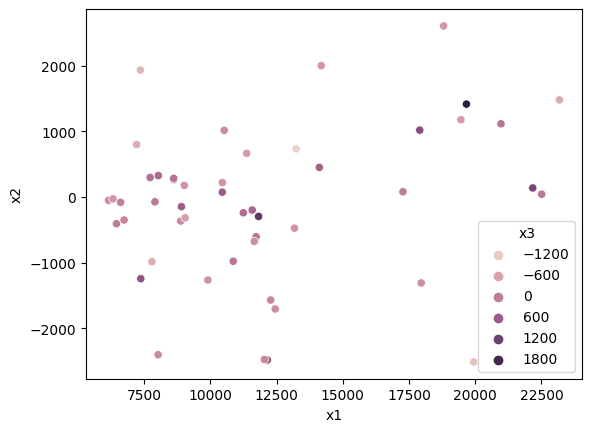

In [14]:
sns.scatterplot(data = df_transformed, x='x1', y='x2', hue='x3')

Кластеризация K-means

<Axes: xlabel='x1', ylabel='x2'>

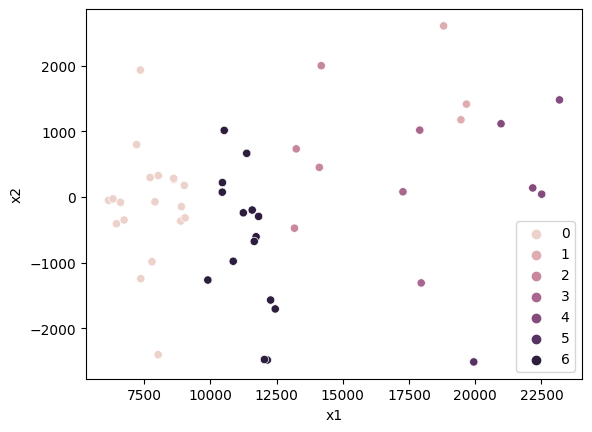

In [15]:
kmeans = KMeans(n_clusters=7, n_init='auto')
kmeans.fit(df_transformed)

sns.scatterplot(data=df_transformed, x='x1', y='x2', hue=kmeans.labels_)

Классификация K-neighbours

In [16]:

neigh = KNeighborsClassifier(n_neighbors=7)
model = neigh.fit(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']], df.loc[:, 'x6'])

Результат классификации на ДФО

In [17]:
pred = model.predict(dv.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']])
dv.reset_index(drop= True , inplace= True )
dv['x6'] = pred
    
display(dv)

,district,x1,x2,x3,x4,x5,x6
0,Республика Бурятия,3377,9471,1806,1285,768,сenter
1,Республика Саха (Якутия),6770,17212,2850,1474,1169,south
2,Забайкальский край,4672,11712,1550,1178,781,сenter
3,Приморский край,6485,12822,2049,1812,2380,сenter
4,Хабаровский край,5689,10688,1877,1648,1800,volga
5,Амурская область,2954,7211,929,977,829,caucasus


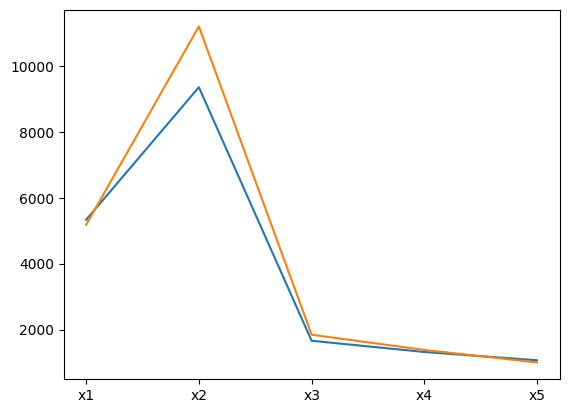

In [18]:

plt.plot(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].median())
plt.plot(dv.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].median())

plt.show()